In [1]:
import cobra
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from pandas import DataFrame
import statistics
import plotly
import plotly.express as px
import plotly.graph_objs as go
import sklearn
from sklearn.cluster import KMeans
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import statsmodels.api as sm

In [2]:
tomics = pd.read_csv(r'/Users/katemeeson/august_2022/ovsaho_ov56_tomics_ensembl2.csv')
tomics

,gene,ensembl_ids,ovsaho,ov56
0,TSPAN6,ENSG00000000003,4.804260,2.319040
1,TNMD,ENSG00000000005,0.000000,0.070389
2,DPM1,ENSG00000000419,7.200163,6.485910
3,SCYL3,ENSG00000000457,2.304511,1.974529
4,C1orf112,ENSG00000000460,4.106013,2.518535
...,...,...,...,...
53908,AC008763.4,ENSG00000288669,0.000000,0.000000
53909,AL592295.6,ENSG00000288670,2.516015,2.550901
53910,AC006486.3,ENSG00000288671,0.526069,0.464668
53911,AL391628.1,ENSG00000288674,0.356144,0.226509


In [39]:
tomics_subset = tomics.iloc[0:100,:]
tomics_subset

,gene,ensembl_ids,ovsaho,ov56
0,TSPAN6,ENSG00000000003,4.804260,2.319040
1,TNMD,ENSG00000000005,0.000000,0.070389
2,DPM1,ENSG00000000419,7.200163,6.485910
3,SCYL3,ENSG00000000457,2.304511,1.974529
4,C1orf112,ENSG00000000460,4.106013,2.518535
...,...,...,...,...
95,PON1,ENSG00000005421,0.263034,0.056584
96,GCFC2,ENSG00000005436,3.575312,2.604071
97,WDR54,ENSG00000005448,5.699330,5.299391
98,CROT,ENSG00000005469,2.918386,2.035624


In [4]:
pomics = pd.read_csv(r'/Users/katemeeson/august_2022/ovsaho_ov56_pomics.csv')
pomics

,ids,ov56,ovsaho
0,S12A2,0.146497,0.287238
1,KDM1A,0.113627,0.567296
2,SRP14,-0.202098,0.858236
3,SOGA1,-1.219654,0.107184
4,NU133,0.354555,0.789124
...,...,...,...
5145,NEXN,1.330227,1.607322
5146,RM18,0.249225,0.880781
5147,CJ032,-0.771999,0.314910
5148,SF3B5,-0.477772,0.673283


In [27]:
pomics_subset = pomics.iloc[0:100,:]
pomics_subset

,ids,ov56,ovsaho
0,S12A2,0.146497,0.287238
1,KDM1A,0.113627,0.567296
2,SRP14,-0.202098,0.858236
3,SOGA1,-1.219654,0.107184
4,NU133,0.354555,0.789124
...,...,...,...
95,NDUA8,-0.363940,0.866520
96,ACBD6,-0.793358,-1.308652
97,OAS2,4.421685,-1.194857
98,NCOR2,-1.581103,-0.456395


In [43]:
common_indexes = []
for n in range(len(pomics['ids'])):
    for ID in tomics['gene']:
        if pomics.iloc[n,0] == ID:
            common_indexes.append(n) #position in pomics df where this id is also in tomics
            print(ID)
common_indexes

KDM1A
SRP14
SOGA1
FUBP3
FUBP1
MMP14
SAMD1
CLPX
RBM42
RCC2
IPO5
GLRX5
RIN1
PRDX5
NCOA2
NCOA3
EP400
MSH6
MSH3
TRUB1
ZFPL1
E2F4
EDC4
TXLNG
TXLNA
YLPM1
RPF1
IPO9
CDC27
SRSF9
SRSF1
TOP2B
TOP2A
PPM1A
PPM1B
HYPK
TOX4
DOCK1
TLN1
TLN2
TACC2
TACC1
NSUN5
CBR4
EFHD2
EGLN1
ATF7
ATF2
EHBP1
BAZ2A
FYCO1
GYS1
ACBD6
OAS2
NCOR2
NCOR1
DHX30
CKAP5
ALDH2
SMTN
TTC5
NSRP1
STIP1
TSC1
RFC1
UBXN4
ANK3
CROCC
MYO1B
MYH14
MYO5A
MYO1D
NUMA1
MYO1E
MYH10
MYH9
MYH11
STMN2
STMN1
OTUD4
MYO1C
EXOC5
BRD4
BRD2
BRD3
BCAR1
DCTN1
DIDO1
PHF3
RBM39
RBM23
CNOT1
MIB1
KDM5A
KDM5C
KDM5D
PEX6
ETFA
TAF6
WIPF2
NSD1
NSD3
NSD2
CIC
BTAF1
PKP4
TTC4
RCOR3
RCOR1
EIF3C
BAG4
XPC
ARAP1
RCC1
POTEF
ACTB
CPSF1
CAND2
CAND1
PTPRK
KDM1B
MED17
LMNA
LMNB1
SND1
SYNPO
BCR
TADA3
EXOC8
GRSF1
IDH3B
COPG2
COPG1
FMNL2
FMNL3
PALM
KIF1B
KIF4B
KIF4A
KIF1C
KIF3B
KIF3A
CCAR1
GPS2
BRCA1
PURA
PURB
DIP2B
NEK7
TANK
GLOD4
AGK
WDR37
UBE3A
TPM3
TPM1
TPM1
TPM2
TPM2
TPM4
TPM4
TPM3
SNX2
SNX1
IDI1
RBBP6
GRHPR
BPTF
SETX
RBM33
IWS1
MAGI1
CBX4
CDC73
PALLD
VDAC3
VDAC1
PRPF3
PHF8

[1,
 2,
 3,
 7,
 8,
 9,
 10,
 11,
 13,
 14,
 15,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 31,
 35,
 36,
 37,
 44,
 45,
 46,
 48,
 49,
 50,
 54,
 55,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 67,
 68,
 71,
 72,
 76,
 77,
 81,
 82,
 86,
 87,
 89,
 90,
 93,
 94,
 96,
 97,
 98,
 99,
 103,
 105,
 108,
 112,
 114,
 115,
 116,
 118,
 120,
 121,
 122,
 125,
 130,
 131,
 132,
 133,
 134,
 135,
 138,
 139,
 140,
 142,
 143,
 144,
 145,
 146,
 150,
 151,
 152,
 153,
 154,
 158,
 159,
 160,
 161,
 164,
 165,
 166,
 167,
 168,
 172,
 173,
 176,
 177,
 178,
 179,
 180,
 181,
 185,
 186,
 187,
 193,
 194,
 196,
 198,
 200,
 207,
 209,
 210,
 212,
 214,
 215,
 216,
 220,
 221,
 222,
 225,
 226,
 229,
 231,
 232,
 237,
 240,
 243,
 244,
 246,
 247,
 249,
 250,
 256,
 266,
 268,
 269,
 270,
 271,
 272,
 275,
 276,
 278,
 279,
 280,
 283,
 286,
 290,
 292,
 293,
 294,
 295,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 313,
 314,
 315,
 316,
 317,
 321,
 322,
 323,
 324,
 328,
 331,
 333,
 335,
 336,
 337,


In [47]:
print(len(common_indexes))

2418


In [45]:
indexes_to_drop = []
for n in range(5150):
    if n not in common_indexes:
        indexes_to_drop.append(n)        
pomics_2 = pomics.drop(pomics.index[indexes_to_drop])
pomics_2

,ids,ov56,ovsaho
1,KDM1A,0.113627,0.567296
2,SRP14,-0.202098,0.858236
3,SOGA1,-1.219654,0.107184
7,FUBP3,-0.502593,-0.255428
8,FUBP1,-0.405403,0.584204
...,...,...,...
5142,SP1,-0.856020,0.061937
5143,SP4,-1.254866,-0.626854
5144,SP3,-0.675146,-0.186320
5145,NEXN,1.330227,1.607322


In [44]:
#do this but with the version where indexes have been dropped, will be quicker. 
common_indexes_2 = []
for n in range(len(tomics['gene'])):
    for ID in pomics['ids']:
        if tomics.iloc[n,0] == ID:
            common_indexes_2.append(n) #position in pomics df where this id is also in tomics
            print(ID)
common_indexes_2
#instead of doing all this code again just align

DPM1
LAS1L
BAD
CD99
LASP1
RBM5
ARF5
SARM1
FKBP4
KDM1A
RBM6
CDC27
DVL2
RPAP3
LAMP2
AP2B1
RALA
AGK
GGCT
PAF1
VPS41
LUC7L
SYPL1
AASS
MGST1
MED24
SEC62
CSDE1
UBE3C
VTA1
BAZ1B
CD9
FYN
UTP18
TTC19
PTBP1
ANLN
WIZ
BRCA1
KDM5D
UBR7
EHD3
MVP
NUB1
RNF14
HEBP1
TACC3
UFL1
COX15
MATR3
CHDH
RUFY3
NCDN
MRE11
SPAST
AQR
FHL1
FHL1
RTF2
ERP44
STRAP
UBR2
EHD2
RRAGD
SEC63
FAS
CD44
MIPEP
BRD9
SNX1
TFB1M
HMGB3
GRN
ALG1
ABCF2
FUT8
UBA6
PEX3
TIMP2
RFC1
CUL3
ZZZ3
NSUN2
MAT2B
EDC4
TRIO
RAI14
PNKP
STAU2
LSG1
MED17
CAPG
AP2S1
JADE2
DSG2
OFD1
WDR37
TPR
MAP4
GOPC
NOP16
RSF1
CELF2
RCN1
RFC2
HEXB
MCUR1
LIMA1
BCAR1
THOC3
HEBP2
RRP12
MSMO1
TTC17
USE1
KIF1B
SYNE2
ATP9A
NOP58
SZRD1
CUL1
KMT2C
PUM2
ZFR
SOAT1
PKP2
ATG5
MTA3
LAMC2
CROCC
NDC1
GATB
CTDP1
WNK1
CCAR1
OGFR
QSER1
ELMO2
WAPL
U2AF2
EPN1
MED29
MTMR1
GPC1
CASP8
TAF2
TNPO3
SUGP2
CNN2
DDX20
PMS1
AP3D1
GNAI3
IPO5
OAT
WDR3
PKN2
WDR18
DGKA
PDIA5
MYLK
SLK
CDK13
DIP2B
NFYC
ISOC1
IDI1
SP100
NEO1
DHX29
RRP15
RHOA
DHX8
IDH3G
ROCK1
PDK3
ACSL4
GPKOW
SRBD1
KIF2A
PSME4
VPS35
NEDD4
U

[2,
 12,
 21,
 23,
 29,
 42,
 45,
 46,
 51,
 52,
 53,
 67,
 71,
 83,
 111,
 125,
 134,
 138,
 145,
 152,
 153,
 184,
 209,
 213,
 217,
 226,
 229,
 231,
 232,
 241,
 243,
 252,
 271,
 288,
 290,
 291,
 297,
 298,
 309,
 320,
 322,
 324,
 330,
 331,
 337,
 340,
 344,
 345,
 353,
 360,
 367,
 376,
 396,
 403,
 408,
 411,
 414,
 414,
 415,
 426,
 433,
 438,
 439,
 442,
 450,
 454,
 456,
 461,
 471,
 472,
 479,
 481,
 486,
 496,
 498,
 501,
 502,
 513,
 524,
 525,
 527,
 531,
 538,
 547,
 549,
 550,
 560,
 562,
 566,
 576,
 585,
 587,
 588,
 595,
 607,
 609,
 613,
 620,
 631,
 632,
 637,
 646,
 648,
 662,
 664,
 670,
 677,
 678,
 686,
 694,
 695,
 700,
 702,
 703,
 711,
 728,
 731,
 733,
 740,
 741,
 743,
 750,
 753,
 758,
 769,
 770,
 775,
 778,
 781,
 787,
 793,
 801,
 807,
 810,
 812,
 813,
 821,
 844,
 845,
 857,
 858,
 859,
 863,
 864,
 868,
 881,
 883,
 889,
 893,
 896,
 903,
 908,
 913,
 914,
 915,
 916,
 917,
 918,
 923,
 929,
 933,
 938,
 949,
 959,
 962,
 978,
 994,
 995,
 998,
 

In [55]:
indexes_to_drop_2 = []
for n in range(53913):
    if n not in common_indexes_2:
        indexes_to_drop_2.append(n)        
tomics_2 = tomics.drop(tomics.index[indexes_to_drop_2])
tomics_2

,gene,ensembl_ids,ovsaho,ov56
2,DPM1,ENSG00000000419,7.200163,6.485910
12,LAS1L,ENSG00000001497,5.815575,4.721373
21,BAD,ENSG00000002330,6.107479,5.119356
23,CD99,ENSG00000002586,6.601994,7.065228
29,LASP1,ENSG00000002834,5.861707,6.537451
...,...,...,...,...
48655,MYO19,ENSG00000278259,5.122259,5.660495
48752,ACACA,ENSG00000278540,3.640390,4.507795
48786,MRM1,ENSG00000278619,2.283922,2.333424
50853,SCO2,ENSG00000284194,3.834913,5.144862


In [48]:
print(len(common_indexes_2))

2418


In [58]:
#are there repeats in the index list? 
common_indexes_2 = list(dict.fromkeys(common_indexes_2))
print(len(common_indexes_2))

2406


In [59]:
common_indexes = list(dict.fromkeys(common_indexes))
print(len(common_indexes))

2418


In [65]:
pomics_ids = pomics_2['ids'].to_list()
tomics_ids = tomics_2['gene'].to_list()
print(len(pomics_ids))
print(len(tomics_ids))

2418
2406


In [67]:
pomics_ids = list(dict.fromkeys(pomics_ids))
print(len(pomics_ids))
#the reason the lengths are different is because there are repeats, export to csv, remove duplicates, and then align with one another. 

2406


In [68]:
pomics_2.to_csv('pomics_correlation.csv')
tomics_2.to_csv('tomics_correlation.csv')

In [69]:
correlation_df = pd.read_csv(r'/Users/katemeeson/august_2022/correlation_df.csv')
correlation_df

,gene_ids,ensembl_ids,t_ov56,t_ovsaho,p_ov56,p_ovsaho
0,AAAS,ENSG00000094914,6.170125,5.902556,0.501190,0.951276
1,AACS,ENSG00000081760,3.323370,4.061776,-0.007521,-0.751645
2,AAGAB,ENSG00000103591,4.169123,4.766595,-0.316021,-2.070748
3,AAK1,ENSG00000115977,2.321928,3.198494,-0.038522,-0.225809
4,AAMDC,ENSG00000087884,4.895303,5.274262,-2.135018,-1.148743
...,...,...,...,...,...,...
2401,ZNF24,ENSG00000172466,3.897240,4.240314,-2.110396,0.135923
2402,ZPR1,ENSG00000109917,4.866908,5.149341,-0.922707,-1.610030
2403,ZW10,ENSG00000086827,4.065228,3.224966,0.136935,0.271981
2404,ZYX,ENSG00000159840,6.883254,6.364397,-0.737850,-0.306240


# correlate pxt ov56

(-0.06641614468699027, 0.0011153623526074532)


/opt/anaconda3/envs/glpk/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'normalised proteomics expression')

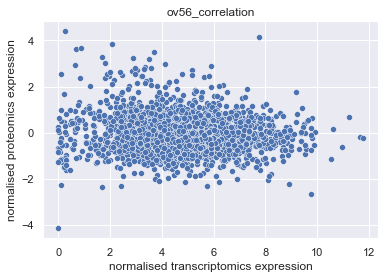

In [72]:
import scipy as sp
import seaborn as sns
sns.set()
tomics_ov56 = correlation_df['t_ov56']
pomics_ov56 = correlation_df['p_ov56']
print(sp.stats.pearsonr(tomics_ov56, pomics_ov56))
sns.scatterplot(tomics_ov56, pomics_ov56).set(title='ov56_correlation')
plt.xlabel('normalised transcriptomics expression')
plt.ylabel('normalised proteomics expression')

(-0.07449169677104159, 0.00025511006731624683)


/opt/anaconda3/envs/glpk/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'normalised proteomics expression')

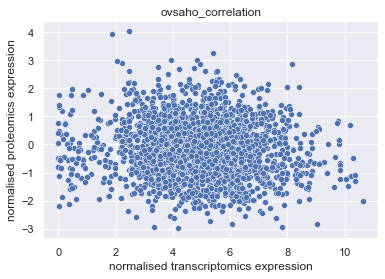

In [73]:
tomics_ovsaho = correlation_df['t_ovsaho']
pomics_ovsaho = correlation_df['p_ovsaho']
print(sp.stats.pearsonr(tomics_ovsaho, pomics_ovsaho))
sns.scatterplot(tomics_ovsaho, pomics_ovsaho).set(title='ovsaho_correlation')
plt.xlabel('normalised transcriptomics expression')
plt.ylabel('normalised proteomics expression')

# find overlap between non-normalise proteomics and normalised transcriptomics

In [6]:
non_norm_pomics = pd.read_csv(r'/Users/katemeeson/august_2022/non_norm_pomics.csv')
non_norm_pomics

,gene_ids,ov56,ovsaho
0,SLC12A2,979.6590,844.3640
1,KDM1A,2033.2200,2026.4100
2,SRP14,621.9970,367.7460
3,SLC15A4,572.0590,97.0091
4,SOGA1,452.1630,514.2010
...,...,...,...
5764,MRPL18,135.3420,267.0310
5765,C10orf32,85.0571,250.8530
5766,SF3B5,1164.6200,1342.5400
5767,CKS2,27.9677,70.8407


In [7]:
common_indexes_3 = []
for n in range(len(non_norm_pomics['gene_ids'])):
    for ID in tomics['gene']:
        if non_norm_pomics.iloc[n,0] == ID:
            common_indexes_3.append(n) #position in pomics df where this id is also in tomics
            print(ID)
common_indexes_3

SLC12A2
KDM1A
SRP14
SLC15A4
SOGA1
NUP133
IRS2
RPL4
KHSRP
FUBP3
FUBP1
MMP14
CLPX
CACTIN
NCL
UNC119
RBM42
RCC2
RANBP6
IPO5
SORT1
LEMD3
GLRX5
RIN1
PRDX5
NCOA2
PDLIM3
EP400
MSH6
MSH3
UBQLN4
UBQLN1
UBQLN2
SH3PXD2B
SH3PXD2A
TRUB1
MICAL1
MICAL3
MICAL2
ZFPL1
E2F4
EDC4
MAGED2
MAGED1
PFDN4
TDP2
INPPL1
INPP5D
TXLNG
TXLNA
YLPM1
N4BP2L2
CNP
RPF1
CDC27
CAMSAP1
CAMSAP2
U2SURP
SRSF9
SRSF1
EXOSC10
B3GAT3
IFT20
TOP2B
TOP2A
PPM1A
PPM1B
HYPK
TOX4
DOCK5
DOCK1
TFRC
FH
TLN1
TLN2
RPL17
TACC2
TACC1
SH3BP4
MAU2
IGFBP7
NSUN5
CBR4
CTNNA1
CTNNA2
EFHD2
EGLN1
MRPL11
STRIP1
DNTTIP1
ATF7
ATF2
EHBP1L1
EHBP1
BAZ2A
ARID1A
ARID1B
FYCO1
GYS1
NDUFA8
ACBD6
OAS2
NCOR2
NCOR1
SDAD1
PRKAG2
PRKAG1
GADD45GIP1
DHX30
SPTLC1
CKAP5
TRAPPC11
ACAD10
ALDH2
ALDH1B1
ALDH1A2
ALDH1A1
SMTN
ALDH1A3
TTC5
NSRP1
STIP1
ST13
TSC1
NNT
RFC1
UBXN4
ANK3
ANK1
ANK2
AFG3L2
CROCC
CEP250
EZR
SPECC1L
RDX
MYO1B
MYH14
MYO5A
MYO1D
NUMA1
TRMT1
GOLGA4
MYH10
MYH9
MYH11
MSN
STMN2
STMN1
OTUD4
MYO1C
EXOC5
PYCR1
PYCR2
BRD4
BRD2
BRD3
BCAR1
DCTN1
SCYL1
CTNND1
DIDO1
PHF3

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 36,
 37,
 38,
 39,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,

In [8]:
indexes_to_drop_3 = []
for n in range(len(non_norm_pomics)):
    if n not in common_indexes_3:
        indexes_to_drop_3.append(n)        
non_norm_pomics_2 = non_norm_pomics.drop(non_norm_pomics.index[indexes_to_drop_3])
non_norm_pomics_2

,gene_ids,ov56,ovsaho
0,SLC12A2,979.6590,844.3640
1,KDM1A,2033.2200,2026.4100
2,SRP14,621.9970,367.7460
3,SLC15A4,572.0590,97.0091
4,SOGA1,452.1630,514.2010
...,...,...,...
5763,NEXN,1813.2600,1090.8100
5764,MRPL18,135.3420,267.0310
5766,SF3B5,1164.6200,1342.5400
5767,CKS2,27.9677,70.8407


In [9]:
common_indexes_4 = []
for n in range(len(tomics['gene'])):
    for ID in non_norm_pomics['gene_ids']:
        if tomics.iloc[n,0] == ID:
            common_indexes_4.append(n) #position in pomics df where this id is also in tomics
            print(ID)
common_indexes_4

TSPAN6
DPM1
FUCA2
GCLC
LAS1L
ANKIB1
CYP51A1
BAD
LAP3
CD99
MAD1L1
LASP1
M6PR
NDUFAF7
RBM5
ARF5
SARM1
POLDIP2
AK2
FKBP4
KDM1A
RBM6
RECQL
SLC25A13
CDC27
HCCS
DVL2
UPF1
SLC25A5
POLR2J
DHX33
LIG3
RPAP3
CIAPIN1
PRKAR2B
CREBBP
PDK2
ITGA3
LAMP2
TMEM132A
AP2B1
SPATA20
RALA
BAIAP2L1
AGK
ALDH3B1
GGCT
PAF1
VPS41
ELAC2
SCIN
CCDC124
PAFAH1B1
KIAA0100
LUC7L
TEAD3
DNAJC11
PSMB1
CDK11A
CYTH3
SYPL1
SPAG9
AASS
MGST1
NFIX
MED24
HEATR5B
SEC62
RPS20
CSDE1
UBE3C
VTA1
BAZ1B
RANBP9
ZNF207
UQCRC1
STARD3NL
CD9
NCAPD2
NISCH
FYN
LYPLA2
MRC2
AKAP8L
UTP18
RNF216
TTC19
PTBP1
LARS2
PIK3C2A
PLAUR
ANLN
WIZ
RABGAP1
PPP5C
MAP4K3
BRCA1
KDM5D
CALCOCO1
UBR7
MAP4K5
PSMC4
MAN2B2
MVP
NUB1
PGM3
POLR3B
RNF14
HEBP1
GPRC5A
TACC3
UFL1
POLA2
CAPN1
MDH1
SLC30A9
COX15
CCDC88C
ZMYND11
BID
MATR3
RGPD5
NUDCD3
CHDH
ATP2C1
RALBP1
RUFY3
AGPS
CXorf56
TTC27
PHLDB1
CD74
NCDN
MNAT1
SERPINB1
SPAST
AQR
CPS1
FHL1
RNH1
NDUFS1
RB1CC1
ERP44
ALAS1
AKAP11
DERA
STRAP
DEF6
GCLM
UBR2
EHD2
RRAGD
NCAPH2
TOMM34
SEC63
KPNA6
VIM
FAS
RNASET2
CD44
MIPEP
IFNGR1
VR

[0,
 2,
 7,
 8,
 12,
 16,
 17,
 21,
 22,
 23,
 28,
 29,
 32,
 41,
 42,
 45,
 46,
 47,
 49,
 51,
 52,
 53,
 55,
 65,
 67,
 70,
 71,
 73,
 75,
 78,
 79,
 82,
 83,
 86,
 90,
 92,
 108,
 109,
 111,
 124,
 125,
 129,
 134,
 135,
 138,
 139,
 145,
 152,
 153,
 155,
 156,
 166,
 168,
 171,
 184,
 190,
 192,
 197,
 202,
 207,
 209,
 211,
 213,
 217,
 220,
 226,
 228,
 229,
 230,
 231,
 232,
 241,
 243,
 244,
 249,
 250,
 251,
 252,
 254,
 259,
 271,
 275,
 277,
 286,
 288,
 289,
 290,
 291,
 294,
 295,
 296,
 297,
 298,
 299,
 302,
 304,
 309,
 320,
 321,
 322,
 323,
 325,
 326,
 330,
 331,
 332,
 335,
 337,
 340,
 341,
 344,
 345,
 346,
 348,
 350,
 351,
 353,
 354,
 356,
 359,
 360,
 363,
 365,
 367,
 372,
 375,
 376,
 380,
 382,
 384,
 387,
 393,
 396,
 400,
 405,
 408,
 411,
 412,
 414,
 423,
 424,
 425,
 426,
 427,
 429,
 432,
 433,
 435,
 437,
 438,
 439,
 442,
 448,
 449,
 450,
 451,
 452,
 454,
 455,
 456,
 461,
 464,
 467,
 469,
 471,
 472,
 475,
 477,
 479,
 480,
 481,
 482,
 486,
 4

In [10]:
indexes_to_drop_4 = []
for n in range(len(tomics)):
    if n not in common_indexes_4:
        indexes_to_drop_4.append(n)        
tomics_3 = tomics.drop(tomics.index[indexes_to_drop_4])
tomics_3

,gene,ensembl_ids,ovsaho,ov56
0,TSPAN6,ENSG00000000003,4.804260,2.319040
2,DPM1,ENSG00000000419,7.200163,6.485910
7,FUCA2,ENSG00000001036,5.416502,5.352970
8,GCLC,ENSG00000001084,3.221877,5.456806
12,LAS1L,ENSG00000001497,5.815575,4.721373
...,...,...,...,...
48752,ACACA,ENSG00000278540,3.640390,4.507795
48786,MRM1,ENSG00000278619,2.283922,2.333424
48882,MRPL45,ENSG00000278845,5.893605,5.313971
50853,SCO2,ENSG00000284194,3.834913,5.144862


In [11]:
#are there any repeats in either df?
print(len(non_norm_pomics_2))
print(len(tomics_3))

5491
5491


In [12]:
#if there are repeats, save to csv and get rid of
non_norm_pomics_2.to_csv('pomics_correlation_2.csv')
tomics_3.to_csv('tomics_correlation_2.csv')

In [13]:
correlation_df_2 = pd.read_csv(r'/Users/katemeeson/august_2022/non_norm_p_correlation_df.csv')
correlation_df_2

,gene_id,ensembl_id,p_ov56,p_ovsaho,t_ov56,t_ovsaho
0,A2M,ENSG00000175899,79.2047,711.8940,0.014355,1.201634
1,AAAS,ENSG00000094914,1053.5600,841.0890,5.902556,6.170125
2,AACS,ENSG00000081760,630.6960,109.8080,4.061776,3.323370
3,AAGAB,ENSG00000103591,211.8070,40.5697,4.766595,4.169123
4,AAK1,ENSG00000115977,635.7640,177.4270,3.198494,2.321928
...,...,...,...,...,...,...
5486,ZWILCH,ENSG00000174442,486.6240,40.3015,3.454176,4.081510
5487,ZWINT,ENSG00000122952,354.8900,145.6090,4.071248,6.789729
5488,ZYX,ENSG00000159840,1512.3500,799.3930,6.364397,6.883254
5489,ZZEF1,ENSG00000074755,842.9140,356.3830,3.941106,2.336283


(0.2240296570956153, 2.019784805689266e-63)


/opt/anaconda3/envs/glpk/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


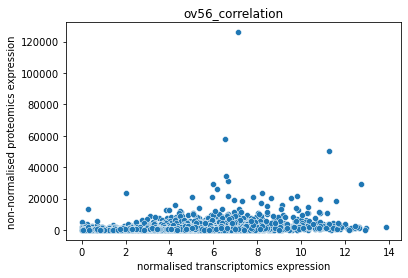

In [16]:
import scipy as sp
import seaborn as sns
#correlate tomics and non-norm pomics to see if this is any better
tomics_ov56_2 = correlation_df_2['t_ov56']
pomics_ov56_2 = correlation_df_2['p_ov56']
print(sp.stats.pearsonr(tomics_ov56_2, pomics_ov56_2))
sns.scatterplot(tomics_ov56_2, pomics_ov56_2).set(title='ov56_correlation')
plt.xlabel('normalised transcriptomics expression')
plt.ylabel('non-normalised proteomics expression')
plt.savefig('ov56_correlation', dpi=1200, bbox_inches='tight')

In [ ]:
tomics_ovsaho_2 = correlation_df_2['t_ovsaho']
pomics_ovsaho_2 = correlation_df_2['p_ovsaho']
print(sp.stats.pearsonr(tomics_ovsaho_2, pomics_ovsaho_2))
sns.scatterplot(tomics_ovsaho_2, pomics_ovsaho_2).set(title='ovsaho_correlation')
plt.xlabel('normalised transcriptomics expression')
plt.ylabel('non-normalised proteomics expression')
plt.savefig('ovsaho_correlation', dpi=1200, bbox_inches='tight')

# finding subset of well-correlated genes

In [ ]:
#use indexes from above on dataset including all cell lines. find files from original visualisation files. 

In [ ]:
%store -r ccle_8
ccle_8.to_csv

In [ ]:
p_omics_ids = ['OVCAR8', 'KURAMOCHI', 'A2780', 'OV90', 'RMUGS', 'OVSAHO', 'OV56', 'OVCAR3', 'JHOS2', 'HEYA8', 'IGROV1', 'FUOV1', 'SNU119', 'OVCAR4', 'TYKNU', 'COV362', 'CAOV3']
OC_indexes = []
for n in range(len(ccle_8['ids'])):
    for name in p_omics_ids:
        if name in ccle_8.iloc[n,53949]:
            OC_indexes.append(n)

indexes_to_drop = []
for n in range(721):
    if n not in OC_indexes:
        indexes_to_drop.append(n)        
data_t17 = ccle_8.drop(ccle_8.index[indexes_to_drop])
data_t17 = data_t17.drop(['ids'], axis=1)
data_t17

In [ ]:
%store -r data_p
data_p